## Stats 504: Practice and Communication in Applied Statistics

Overall goal: Prepare students to provide master-level statistical support for collaborative, interdisciplinary work and research

- Communicating statistics with non-statistical experts
- Understanding statistical theory and limitations
- Data formatting and statistical programming
- Clear, effective writing
- Using graphics to communicate ideas

## About me
- Joint PhD at Carnegie Mellon University in Engineering & Public Policy and in Statistics & Data Science
- Second year postdoc at UM in the network statistics research group
- Worked as a master-level biostatistician for 5 years in HIV/STI research before PhD
 - 60% data formatting and cleaning
 - Collaborators expected me to also be an expert in HIV/STI, present at conferences
 - Needed to use methods I never learned before
 - Communicate statistical material with non-statistical experts
 - Gave me some real-world statistical background before my PhD

## Course Layout

- Lectures will be modeled as case studies
    - Exploratory Data Analysis (EDA)
    - Methods and strategies
    - Tips for communication
    - Code will be in either python3 or R


- [Canvas](https://umich.instructure.com/courses/516710)
    - submit assignments
    - get course materials
    - grading
    - lecture capture


- [iClicker](https://www.iclicker.com) mobile app to survey class
    - 5% of grade
    - 1 point for each lecture with 75% response rate


- [Github](https://github.com/omesner/UMSTATS504)
    - course materials
    - may be more up-to-date then canvas


- [Piazza](https://piazza.com/class/ky0bk6zt4jo792?cid=6)
    - Ask questions that will be helpful to the class


- [Zoom](https://umich.zoom.us/j/93271688199)
    - For when you are sick
    - In person is encouraged
    - Policies may change if in-person attendance is low


- Homework
    - Attempts to simulate work experience
    - Individual assignments are 3 pages (not including graphics/tables), well-written memo of finding for non-statistical audience
    - Group work is typically 5 pages
    - Must include reproducible code appendix (does not count toward page count), typically in Jupyter Notebook or Rmarkdown
    - Submitted through Canvas as a **single** PDF file
    - Do **not** include your name on your homework


- [Writing tips](http://dept.stat.lsa.umich.edu/~kshedden/stats504/topics/writing_tips/)


- Reproducible code makes your work more transparent to others.  You will be required to submit your reproducible code: [Rmarkdown](https://rmarkdown.rstudio.com), [Jupyter notebook](https://jupyter.org)


- [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/), [Rmarkdown tutorial](https://r4ds.had.co.nz/r-markdown.html)


- **Question**: Have you used either of these before?

    a. Yes
    
    b. No


- Assignments will be assess on writing quality, clarity, reproducible code, statistical correctness

### Student Well-Being

- Experiencing some amount of stress during graduate school is normal


- Too much stress can impact academic performance and personal well-being


- In academia, evaluation is necessary but also a significant source of stress for many


- In this course, we will be evaluating your writing quality, code, graphics, and tables


- Reading critiques can be difficult but are meant to help develop professional skills


- My goal is to develop your skills


- I want to be aware of the time assignments take


- I want your feedback


- Generally, if you are experiencing concerns related to this course or otherwise, please contact me (omesner@umich.edu) so that we can work on solutions


- Other [resources for student well-being](https://wellbeing.studentlife.umich.edu/resources-list)

## Case Study: Derogatory Credit Reports

- Our client is an economist working at a major credit card company


- She would like to identify factors that could potentially contribute to the number of derogatory reports on a credit card applicant's credit history


- The most common reasons for derogatory credit reports on an individual's credit history include missed payments, bankruptcy, repossessions, and foreclosures.


- Most individual reports will stay on someone’s credit history for up to seven years to ten years.


- The client's company collected data from individual credit card applications and other background information the company uses to determine the suitability of issuing a credit card to the applicant.


Data dictionary:

card - was the application for a credit card accepted?  The variables included contributed to determining this.

reports - number of derogatory reports

age -  applicant age in years at time of application

income - yearly income in 10,000 USD

share - ratio of monthly credit card expenditure to yearly income (generated from income and expenditure)

expenditure - average monthly credit card expenditure

owner - does the applicant own their home?

selfemp - is the individual self-employed?

dependents - number of dependents

months - number of months living at current address

majorcards - does the applicant have other major credit cards?

active - number of active credit accounts


Question: What types of regression might we consider here?

    a. Linear regression
    b. Negative binomial regression
    c. Poisson regression
    d. Gamma regression
    e. Not sure yet

In [1]:
%%capture
%pip install pandas
%pip install statsmodels
%pip install numpy
%pip install matplotlib

Above: you can remove suppress unhelpful output in Jupyter notebook with `%%capture`

Below: importing the following modules

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt
%matplotlib inline

- First several lines of data file (normally you can just open the file)

In [3]:
file = open('derogatory.csv')
for _ in range(6):
    print(file.readline())

"card","reports","age","income","share","expenditure","owner","selfemp","dependents","months","majorcards","active"

"yes",0,37.66667,4.52,0.03326991,124.9833,"yes","no",3,54,"yes",12

"yes",0,33.25,2.42,0.005216942,9.854167,"no","no",3,34,"yes",13

"yes",0,33.66667,4.5,0.004155556,15,"yes","no",4,58,"yes",5

"yes",0,30.5,2.54,0.06521378,137.8692,"no","no",0,25,"yes",7

"yes",0,32.16667,9.7867,0.06705059,546.5033,"yes","no",2,64,"yes",5



Read in data

In [4]:
df = pd.read_csv('derogatory.csv')

Visually inspecting data

In [5]:
df.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,yes,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,yes,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,yes,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,yes,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,yes,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,yes,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,yes,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,yes,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,yes,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,yes,18


#### Size of data
- Size of dataset: (rows, columns)

In [6]:
df.shape

(1319, 12)

- Normally we will use this info like this in the body of the beginning of the results:

The data were were collected from individual credit card applications; each row represents an individual applicant.
In total, the data contain 1,319 applicants (rows) each with 12 variables.

### Visualize variable distributions
- Consider kinds of variables in the data
- Consider size of dataset (rows and columns)
- Look for anything strange in the data

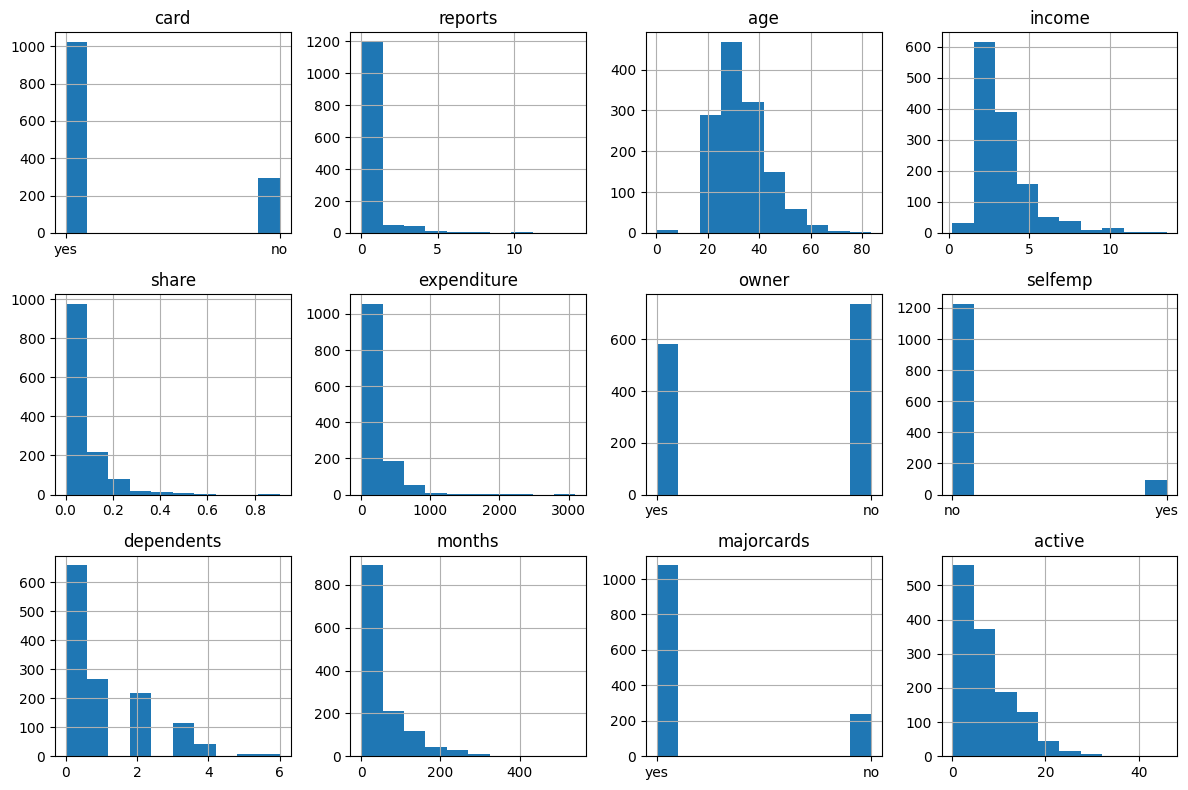

In [7]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df, df.columns, 3, 4)

- Typically, a plot like this belongs in the appendix where the reader can look if they want more detail than you provide in the body of the report
    - We will give similar information in the body of the report with the table above


- Thoughts on plots:
    - age has some very small values
    - reports is heavily skewed left
    - Everything else looks normal to me
    - reports is the outcome and because of it's unique distribution
    - Want to illustrate the distribution of reports in body of report so I will take more time to make it look nice


- Counting number of rows with `age < 18`, visually inspecting
    - If we delete these rows, we need to mention it in results

In [8]:
print(f'Number of rows with age < 18: {sum(df.age < 18)}')
df[df.age<18]

Number of rows with age < 18: 7


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
78,yes,0,0.500000,3.05,0.101724,258.54920,no,no,1,94,yes,5
323,yes,0,0.166667,3.24,0.184366,497.70580,yes,no,3,25,yes,16
434,yes,0,0.583333,2.50,0.083171,173.02330,no,no,0,150,yes,5
461,no,0,0.750000,3.00,0.000400,0.00000,no,no,0,18,no,2
655,yes,0,0.583333,4.00,0.072664,242.12830,yes,no,3,24,yes,4
658,yes,1,0.500000,3.70,0.010637,32.46416,no,no,0,186,no,5
1194,yes,0,0.750000,1.60,0.154191,205.25420,no,no,0,1,yes,9


### Scatter Plots by Response Variable

- It's a good idea to look at how each variable is related to the response variable


- This is a good time to see if there are [highly leveraged points](https://online.stat.psu.edu/stat462/node/170/)

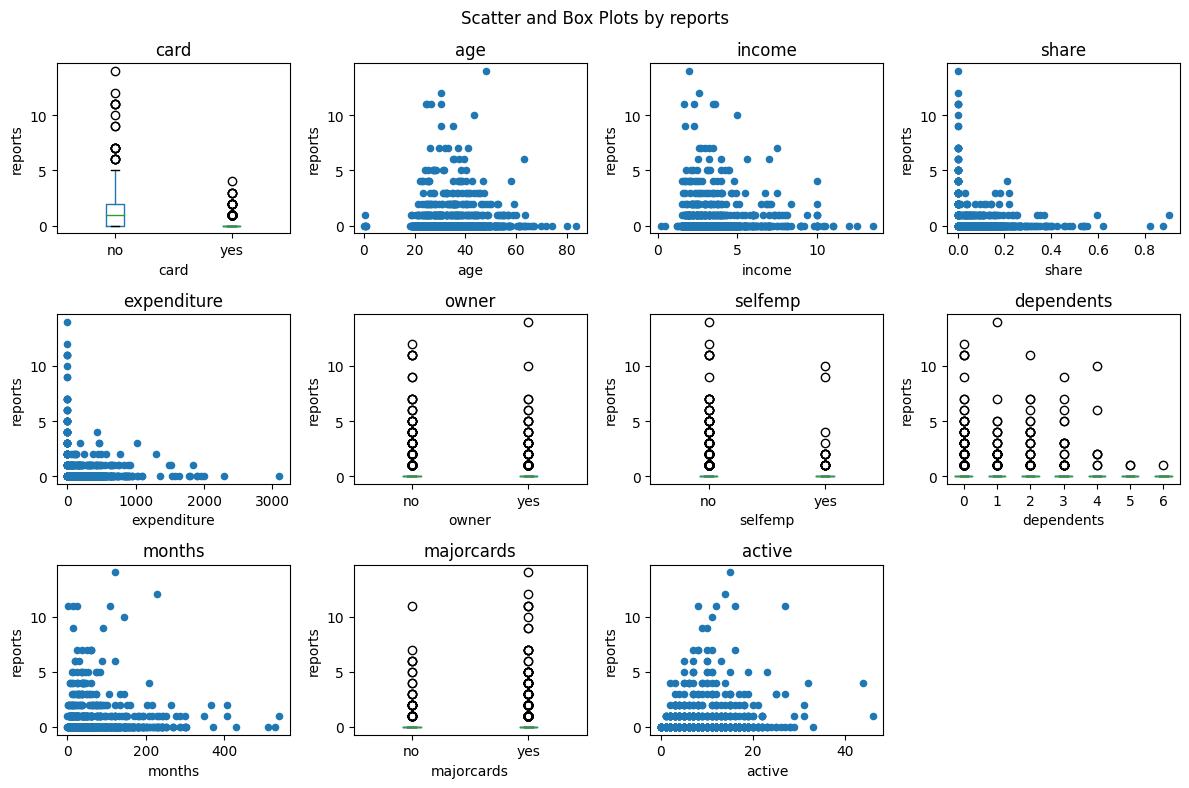

In [9]:
def draw_outcome_plots(df, outcome, n_rows, n_cols):
    fig=plt.figure()
    variables = df.columns.drop(outcome)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if len(df[var_name].unique()) > 10:
            df.plot.scatter(x= var_name, y= outcome, ax=ax)
        else:
            df.boxplot(column=outcome, by=var_name, grid = False, ax=ax)
            ax.set(ylabel=outcome)
        ax.set_title(var_name)
    fig.suptitle('Scatter and Box Plots by '+outcome)
    fig.tight_layout()
    plt.show()

draw_outcome_plots(df, 'reports', 3, 4)

### Cleaning Data

- Data cleaning can mean many different thing
    - creating variables from a data base to answer a research question
    - understanding missingness
    - removing observations (rows) that are probably generated from a different distribution or have significant measure error


- Start by understanding missing values

In [10]:
df.isna().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

- This is saying that pandas doesn't have missing value indicators


- Be aware that there may be other ways to indicate missing values, like a white space string or a numeric code


- Removing 7 rows with `age < 18`


- Note that because `share = expenditure / income` we can exclude one ([multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity))


- This data was used to decide if an applicant should be approved for a credit card, and it seems likely that the number of derogatory reports would influence credit card approval.  Because of this, we need to exclude the `card` variable.


- Removing `card` and `share`

In [11]:
dfc = df[df.age >= 18].drop(['card', 'share'], axis=1)

### Pairwise correlations

- It's helpful to look at pairwise correlations


- Question: Why do we care about this?

    a. There will be redundancy in the regression design matrix
    
    b. Regression variance inflation
    
    c. We don't care about this

In [12]:
dfc.corr()

,reports,age,income,expenditure,dependents,months,active
reports,1.000000,0.041255,0.010545,-0.136273,0.020255,0.048446,0.208139
age,0.041255,1.000000,0.330573,0.016491,0.219071,0.454619,0.185389
income,0.010545,0.330573,1.000000,0.281571,0.317409,0.130519,0.181094
expenditure,-0.136273,0.016491,0.281571,1.000000,0.050465,-0.028117,0.053160
dependents,0.020255,0.219071,0.317409,0.050465,1.000000,0.049151,0.105744
months,0.048446,0.454619,0.130519,-0.028117,0.049151,1.000000,0.101594
active,0.208139,0.185389,0.181094,0.053160,0.105744,0.101594,1.000000


- The `corr` method automatically removes categorical variables without telling you

In [13]:
# getting categorical variables
cat_vars = dfc.select_dtypes(exclude=np.number)
# making shallow copy of dataframe
dfc_num = dfc.copy()
for var in cat_vars:
    # changing yes/no to 1/0
    dfc_num[var] = dfc[var].map(dict(yes=1, no=0))
dfc_num.corr()

,reports,age,income,expenditure,owner,selfemp,dependents,months,majorcards,active
reports,1.000000,0.041255,0.010545,-0.136273,-0.053783,0.018506,0.020255,0.048446,-0.006620,0.208139
age,0.041255,1.000000,0.330573,0.016491,0.373835,0.098527,0.219071,0.454619,0.005397,0.185389
income,0.010545,0.330573,1.000000,0.281571,0.324331,0.112083,0.317409,0.130519,0.108102,0.181094
expenditure,-0.136273,0.016491,0.281571,1.000000,0.091689,-0.035588,0.050465,-0.028117,0.075281,0.053160
owner,-0.053783,0.373835,0.324331,0.091689,1.000000,0.041330,0.305946,0.242505,0.061536,0.274166
selfemp,0.018506,0.098527,0.112083,-0.035588,0.041330,1.000000,0.042235,0.066467,0.004485,0.029499
dependents,0.020255,0.219071,0.317409,0.050465,0.305946,0.042235,1.000000,0.049151,0.007194,0.105744
months,0.048446,0.454619,0.130519,-0.028117,0.242505,0.066467,0.049151,1.000000,-0.039545,0.101594
majorcards,-0.006620,0.005397,0.108102,0.075281,0.061536,0.004485,0.007194,-0.039545,1.000000,0.118194
active,0.208139,0.185389,0.181094,0.053160,0.274166,0.029499,0.105744,0.101594,0.118194,1.000000


### Baseline data description

- Show basic statistics for cleaned data


- Frequently, applied papers will want to see a table giving mean (st dev) or medians (IQR)

In [14]:
dfc.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
reports,1312.0,0.46,1.35,0.00,0.00,0.00,0.00,14.0
age,1312.0,33.39,9.88,18.17,25.42,31.29,39.42,83.5
income,1312.0,3.37,1.70,0.21,2.24,2.90,4.00,13.5
expenditure,1312.0,184.97,272.71,0.00,4.58,101.23,248.97,3099.5
dependents,1312.0,0.99,1.25,0.00,0.00,1.00,2.00,6.0
months,1312.0,55.18,66.25,0.00,12.00,30.00,72.00,540.0
active,1312.0,7.00,6.31,0.00,2.00,6.00,11.00,46.0


- `describe` only shows numeric variables


- below is one way to get percentages for categorical variables

In [15]:
def get_categorical_percentages(df):
    cat_df = df.select_dtypes(exclude=np.number)
    for var in cat_df.columns:
        perc = df[var].value_counts() / df[var].count()
        print(var)
        print(perc)
        
get_categorical_percentages(dfc)

owner
no     0.558689
yes    0.441311
Name: owner, dtype: float64
selfemp
no     0.93064
yes    0.06936
Name: selfemp, dtype: float64
majorcards
yes    0.817835
no     0.182165
Name: majorcards, dtype: float64


- The table above is quick to make but not immediately clear without context


- Table should be formatted with easily understandable text description and units


- There should be a caption


- The number of significant digits may change from variable to variable


- You can also choose to show mean and standard deviation

| Variable | Median (IQR) or Percent |
| --- | --- |
| Age (years) | 31.29 (25.42, 39.42) |
| Yearly Income (10,000 USD) | 2.90 (2.21, 4.00) |
| Average Monthly Credit Card Expenditure | 101.23 (4.58, 249.97) |
| Homeowner (%) | 44.1 |
| Self Employed (%) | 6.9 |
| Number of Dependents | 1 (0, 2) |
| Months Living at Current Address | 30 (12, 72) |
| Has other major credit cards (%) | 81.8 |
| Number of Active Credit Accounts | 6 (2, 11) |

Table 1: The table above shows either the median value for each variable in the data with its interquartile range (25%, 75%) or percent of data for yes/no variables.

- Notice that I didn't include reports, share and card
    - reports is the outcome so I will pay special attention to it
    - from the data dictionary, share = expenditure/income
    - reports is used to decide card (if an application is approved)

- creating histogram of reports for body of report


- anything in the body of the report should be publication quality

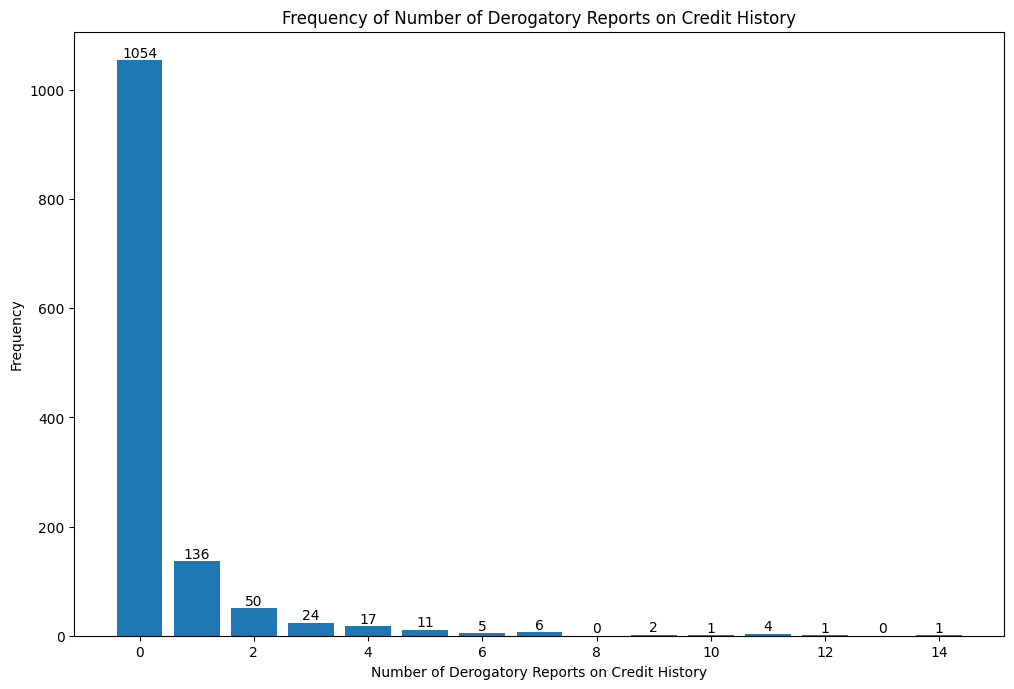

In [16]:
rep_range = dfc.reports.max()+1
counts = dfc.reports.value_counts(sort=False).reindex(range(rep_range), fill_value=0)
plt.bar(range(rep_range), counts)
for index, value in enumerate(counts):
    plt.text(index, value, str(value), horizontalalignment='center', 
             verticalalignment='bottom')
plt.title('Frequency of Number of Derogatory Reports on Credit History')
plt.ylabel('Frequency')
plt.xlabel('Number of Derogatory Reports on Credit History')
plt.show()

- The plot above does not make a good use of space (the majority of the plot is empty space)
- We can fix this with a broken barplot (below)

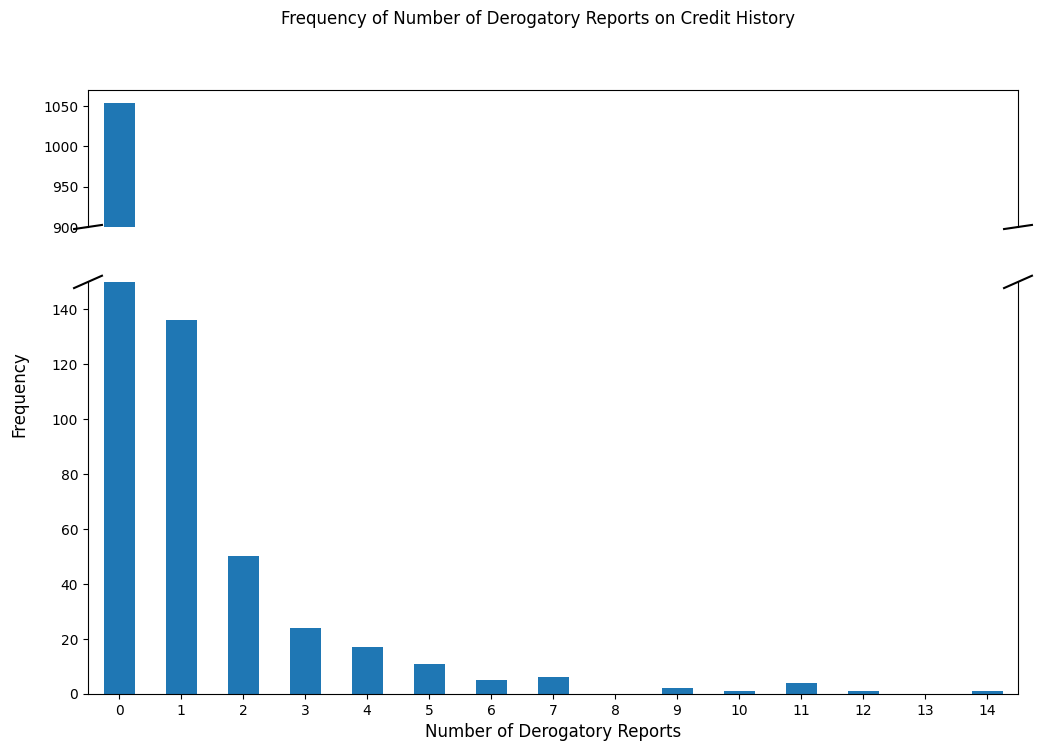

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                             gridspec_kw={'height_ratios': [1, 3]})
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,150)
ax1.set_ylim(900,1070)
ax1.set_yticks(np.arange(900,1071,50))
counts.plot(ax=ax1,kind='bar')
counts.plot(ax=ax2,kind='bar')
for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax2.set_xlabel('Number of Derogatory Reports', size = 12)
fig.suptitle('Frequency of Number of Derogatory Reports on Credit History')
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', size=12)
plt.show()

**Coding tip: DRY - Don't Repeat Yourself**

- write functions that you will use again

## Generalized Linear Models (GLMs)
- Robust class of models that are frequently used in classical statistics


- **Inference**: Use the model to learn about the *data generation process*


- **Prediction**: Use the model to predict the outcomes for new data points


- Let $x = (1, x_1, x_2,\dots, x_p)$, $\beta = (\beta_0, \beta_1, \beta_2,\dots, \beta_p)$, and their dot product, $x\beta = \beta_0+\beta_1x_1+\dots+\beta_px_p$


- GLMs model a transformation, $g$, of conditional expectation as a linear function:
$$g(E[Y|X=x])=x\beta$$


- $g$ called a link function and should be invertible
$$E[Y|X=x]=g^{-1}(x\beta)$$


- Most common link functions are $g(t)=t$, (so that $g^{-1}(s)=s$) and $g(t)=\log(t)$ (so that $g^{-1}(s) = \exp(s)$)


- How is $g(E[Y|X=x])$ different from $E[g(Y)|X=x]$?


- Two examples:
    - Gaussian linear model: 
    $$(Y|X=x) \sim N(x\beta, \sigma) \Rightarrow E[Y|X=x] = x\beta$$
    - Poisson log-linear model: 
    $$(Y|X=x) \sim \text{Poisson}(\exp(x\beta)) \Rightarrow E[Y|X=x] = \exp(x\beta)$$
 
 
- In general, which model to use depends on the conditional distribution of $Y|X$


- GLMs specify both conditional mean structure and conditional variance structure


- Remember: Inference problems, we want to give confidence intervals and $p$-values.  Both depend on $\text{Var}[Y|X=x]$, so we need it to be accurate.


- example: $Y\sim \text{Poisson}(\lambda)$ then $\lambda = E[Y]=\text{Var}[Y]$


- Can we use a Poisson model if $E[Y|X]\neq\text{Var}[Y|X]$ in data?
    - Overdispersion: $\text{Var}[Y|X]=\phi E[Y|X]$ for $\phi\geq 0$
    - Negative binomial: $\text{Var}[Y|X] = E[Y|X]+\alpha E[Y|X]^2$
 
 
- In general, data does not need to be perfect to use a model


- Common GLMs:
    - Binomial (logistic)
    - Poisson
    - Negative Binomial
    - Gaussian

### Poisson Regression and Parameter Estimation
- Random sample $(y_1, x_1), \dots, (y_n, x_n)$
 * $x_i=[1, x_{i1}, \dots, x_{ip}]$ where we include the 1 for the intercept
 
 
- Recall the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) gives the probability of a given number of independent events occurring in a fixed space or time at a constant rate
    - Example: number of calls received per hour at call center or number of people arriving at a restaurant
    - PDF: $$p(t) = \frac{\lambda^t}{t!}\exp(-\lambda)$$
    - Expected value: $$E[T] = \lambda$$
    
    
- Assume $\log E[Y|X=x]= x\beta$ so that $\lambda = \exp(x\beta)$
and
$$\begin{align}
p(y|x;\beta)
&=\frac{\lambda^y}{y!}\exp(-\lambda) \\
&= \frac{\exp\left(y x\beta\right)}{y!}\exp\left(-\exp(x\beta)\right)
\end{align}$$


- Want to estimate $\beta$; use log-likelihood:
$$
\begin{align}
\ell(\beta) 
&= \log\left(\prod_{i=1}^n p(y_i|x_i;\beta)\right) \\
&= \log\left( \prod_{i=1}^n \frac{\exp\left(y_i x_i \beta\right)}{y!}\exp\left(-\exp(x_i \beta)\right) \right)\\
&= \sum_{i=1}^n \left(y_i x_i \beta- \log(y_i!) -\exp(x_i\beta)\right)
\end{align}
$$


- **Question**: Is this clear?

    a. yes
    
    b. no


### Optimization

- Want to find $\beta^* = \arg\max_\beta \ell(\beta)$


- Remember that $\log p \leq 0$ because $p \leq 1$
    - Because $\log x$ is monotonically increasing, so maximize $p$ if and only if maximize $\log p$
    - Because $\log p \leq 0$, trying to get close to zero


- $\ell(\beta)$ is maximized when $\nabla\ell(\beta) =0$ 
    - From calc 1: Set $\nabla\ell(\beta) =0$ and solve


- Here $\nabla\ell(\beta)=0$ is not simple to solve


- Because $-\nabla^2 \ell(\beta)$ [semi-positive definite](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) matrix, we know that $-\ell(\beta)$ is a convex function

<img src="./convex.png" width="300">


We can use a convex optimization technique such as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent):


   1. Calculate $\nabla \ell(b)$ where $b\in\mathbb{R}^{p+1}$
 $$
 \nabla \ell(b) = \sum_{i=1}^n y_i x_i - x_i \exp(x_i b)
 $$
 
 
   2. Choose a starting point $b_0$ in the $\mathbb{R}^{p+1}$ (the space where $\beta$ is)
 
 
   3. Choose a step size, $\gamma$
 
 
   4. Algorithm, step $j$:
    $$b_{j+1} \leftarrow b_j+\gamma \nabla\ell(b_j)$$
 
 
   5. Stop algorithm when $\ell(b_j)\geq \ell(b_{j+1})$ 
 
 
   6. Set $\beta \leftarrow b_j$
 
 
 Note: It's more common to make $\gamma$ decrease as the algorithm progresses
 
 <img src="./Gradient_descent.svg.png" width="300">
 
Image from Wikipedia


- Why not use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton's_method)?


- In step 4, why are we adding for gradient descent?


### Model fitting for inference in practice


- The goal of regression is often to understand (positive or negative) associations with an outcome


- The goal is **not** always to fit the perfect model


- Research goals and audience expectation will have the biggest effect on model/variable selection


- Your job is to balance model fit with audience expectations


- Many researchers will want to include other variables of interest in the model, even when it does not improve model fit
    - This gives more information on associations with outcome 


- Model selection often needs to be a discussion to determine how to meet the goals of the current work


- Sometimes, there is room for several good models


- Other times, it is difficult to choose between models because statistical complexity


- Your job as the statistician is sort through the difficulty in the data and make a decision to present **one** clear model for a response variable


- Sometimes it's tempting present several models and explain the statistical complexity or model assumptions for each


- Presenting more than one model for a response shifts your job onto the reader.  Don't do this.


- **Question**: What to do with other models that you've worked on?

    a. Delete them and don't mention them in the report
    
    b. Keep them in the appendix and don't mention in report
    
    c. Use them as sensitivity analyses to support your decisions
    
    d. Present them all in the body of your report


- Sensitivity analysis: changing model/assumptions to understand how *robust* outcomes are under varying models/assumptions

### Choosing Variables

- Goal: Better understand factors potentially contributing to the number of derogatory reports on an individual's credit history


- Because $n \gg p$ (rows much greater than columns), we should include all variables except those that we exclude based on reasoning
    - There is no rule on how large $\frac{n}{p}$ needs to be
    - $n=$ number of rows, $p=$ number of parameters to estimate


- Remember, when using a software package for the first time, look over the [documentation](https://www.statsmodels.org/stable/glm.html)

In [18]:
expr = '''reports ~ age + income + expenditure + owner + 
        selfemp + dependents + months + majorcards + active'''
fitPois = sm.GLM.from_formula(
    expr, data=dfc, family=sm.families.Poisson()).fit()
fitPois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1302
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.5
Date:                Mon, 10 Jan 2022   Deviance:                       1897.6
Time:                        21:28:40   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1482      0.181     -6.360      0.000      -1.502      -0.794
owner[T.yes]         -0.7820      0.103     -7.610      0.000      -0.983      -0.581
selfemp[T.yes]       -0.0237      0.150     -0.158      0.875      -0.318       0.271
majorcards[T.yes]    -0.0309      0.106     -0.292      0.770      -0.238       0.176
age                   0.0008      0.005      0.167      0.867      -0.009       0.010
income                0.0658      0.027      2.481      0.013       0.014       0.118
expenditure          -0.0038      0.000    -10.372      0.000      -0.005      -0.003
dependents            0.0882      0.036      2.478      0.013       0.018       0.158
months                0.0024      0.001      3.818      0.000       0.001       0.004
active                0.0768      0.005     16.554      0.000       0.068       0.086
=====================================================================================
"""

- **Question**: If were to settle on the model above, what do we need to do to make it publication quality?

    a. Give variables readable names
    
    b. Exponentiate point estimates and confidence intervals
    
    c. Drop standard error and z columns
    
    d. All of the above
    
    e. Nothing, it looks good


- What might be problematic with this model above?

### Zero-Inflated Poisson (ZIP)

- ZIP was develop specifically for count data where there are far more zeros than there should be in a Poisson-distributed random variable


- ZIP is an example of a mixture model


##### General mixture model with two states

- $p_0(y), p_1(y)$ are probability densities


- $Z\sim\text{Burnoulli}(\pi)$, that is, $P(Z=1)=\pi, P(Z=0)=1-\pi$


- Mixture model: $Y|Z \sim p_z$
    - $Y\sim p_0$ when $Z=0$
    - $Y\sim p_1$ when $Z=1$
    
    
- Mixture model density:
$$p(y) = \pi p_1(y) + (1-\pi) p_0(y)$$
    
    
##### ZIP mixture model

- $p_0(y) = I(y=0)$


- $p_1(y) = \frac{\lambda^y}{y!}\exp(\lambda)$


- ZIP density:
$$\begin{align*}
p(y; \pi, \lambda) 
&= \pi I(y=0) + (1-\pi) \frac{\lambda^y}{y!}\exp(-\lambda) \\
&= \begin{cases}
\pi + (1-\pi)\exp(-\lambda) &\text{when } y=0 \\
(1-\pi) \frac{\lambda^y}{y!}\exp(\lambda) &\text{when } y>0 
\end{cases}
\end{align*}$$

- Need to estimate $\pi$ and $\lambda$.  Can use MLE


- ZIP likelihood: Assume we have data, $y_1,\dots, y_n$, and $n_0=\sum_{i=1}^n I(y_i=0)$
$$
\begin{align*}
&\ell(\pi,\lambda)
= \log \prod_{i=1}^n p(y;\pi,\lambda) \\
&= \log \prod_{i=1}^n \left( \left[\pi + (1-\pi)\exp(-\lambda)\right]^{I(y_i=0)} \left[(1-\pi) \frac{\lambda^{y_i}}{y_i!}\exp(\lambda)\right]^{I(y_i\neq 0)} \right) \\
&= \log \left(\left[\pi + (1-\pi)\exp(-\lambda)\right]^{n_0} [(1-\pi)\exp(\lambda)]^{n-n_0} \prod_{i=1}^n \frac{\lambda^{y_i}}{y_i!} \right) \\
&= n_0\log\left(\pi + (1-\pi)\exp(-\lambda) \right) \\
&\quad+ (n-n_0)[\log(1-\pi)+\lambda]+\log(\lambda)\sum_{i=1}^n y_i -\log\prod_{i=1}^n y_i!
\end{align*}
$$


- Can calculate $\frac{\partial \ell}{\partial \pi}$ and $\frac{\partial \ell}{\partial \lambda}$ then use gradient descent or other optimization method


- When doing regression, some covariates will contribute to $\pi$ and some to $\lambda$.

Code below:

- Looking at data with respect to zero vs non-zero


- This will help decide which variables to include in inflation term

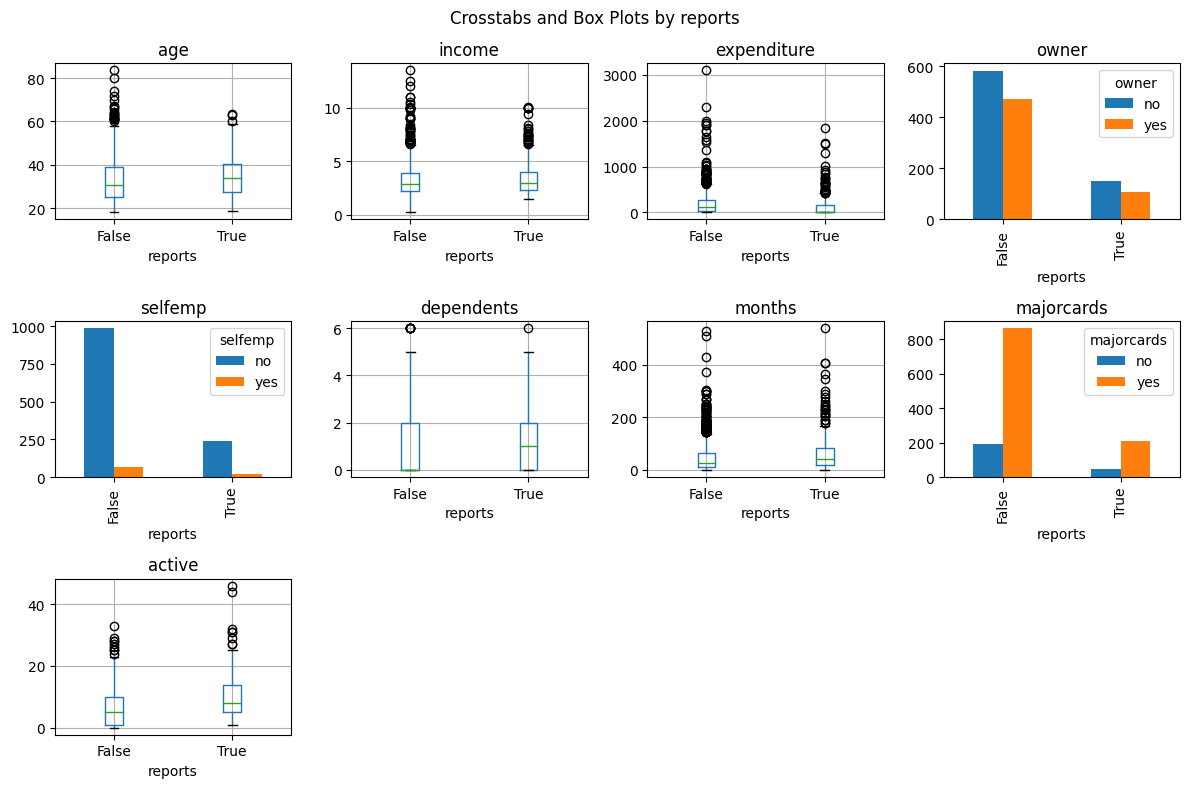

In [19]:
df_bin = dfc.copy()
df_bin.reports = dfc.reports.map(lambda x: x>0)

def disc_outcome_plots(df, outcome, n_rows, n_cols):
    fig=plt.figure()
    variables = df.columns.drop(outcome)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if len(df[var_name].unique()) > 5:
            df.boxplot(column= var_name, by= outcome, ax=ax)
        else:
            pd.crosstab(df[outcome], df[var_name]).plot.bar(ax=ax)
        ax.set_title(var_name)
    fig.suptitle('Crosstabs and Box Plots by '+outcome)
    fig.tight_layout()
    plt.show()
    
disc_outcome_plots(df_bin, 'reports', 3, 4)

- Only `dependents` look like they might influence zero vs more than zero


Code below:

- Using ZIP in `statsmodels`


- To use this model, we must provide `ZeroInflatiedPoisson` with numeric design matrices for count variables, `exog`, and inflation variables, `exog_infl`


- I'm use a dataframe from earlier to create them

In [20]:
exog_vars = ['age', 'income', 'expenditure', 'owner', 'selfemp',
             'months', 'majorcards', 'active']
infl_vars = ['dependents']
fitZip = sm.ZeroInflatedPoisson(
        dfc_num.reports, exog=sm.add_constant(dfc_num[exog_vars]), 
        exog_infl=sm.add_constant(dfc_num[infl_vars])).fit()
fitZip.summary2()

         Current function value: 0.810568
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 39


/Users/roctavio/Documents/umich/statConsulting/env/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/roctavio/Documents/umich/statConsulting/env/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1090: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/roctavio/Documents/umich/statConsulting/env/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1267: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
/Users/roctavio/Documents/umich/statConsulting/env/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1268: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
/Users/roctavio/Documents/umich/statConsulting/env/lib/python3.9/site-packages/stats

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: ZeroInflatedPoisson
====================================================================
Model:              ZeroInflatedPoisson Pseudo R-squared: 0.064     
Dependent Variable: reports             AIC:              2144.9296 
Date:               2022-01-10 21:28    BIC:              2191.5434 
No. Observations:   1312                Log-Likelihood:   -1063.5   
Df Model:           8                   LL-Null:          -1136.6   
Df Residuals:       1303                LLR p-value:      1.2279e-27
Converged:          0.0000              Scale:            1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
inflate_const         0.9886   0.0998  9.9008 0.0000  0.7929  1.1843
inflate_dependents   -0.0817   0.0629 -1.2989 0.1940 -0.2049  0.0416
const                 0.3169   0.2191  1.4466 0.1480 -0.1125  0.7463
age                  -0.0028   0.0060 -0.4678 0.6399 -0.0145  0.0089
income                0.0387   0.0300  1.2883 0.1976 -0.0202  0.0976
expenditure          -0.0024   0.0003 -7.7454 0.0000 -0.0031 -0.0018
owner                -0.5214   0.1110 -4.6959 0.0000 -0.7390 -0.3038
selfemp              -0.0121   0.1724 -0.0699 0.9443 -0.3499  0.3258
months                0.0010   0.0006  1.5269 0.1268 -0.0003  0.0023
majorcards            0.1246   0.1185  1.0520 0.2928 -0.1076  0.3568
active                0.0471   0.0054  8.6691 0.0000  0.0364  0.0577
====================================================================

"""

- The warning is telling us that the MLE optimization algorithm isn't converging and to check `fitZip.mle_retvals`


- Sometimes code does not work properly in practice


- Let's try in R

In [21]:
%load_ext rpy2.ipython

In [22]:
%%R -i dfc
# line above tell jupyter notebook to use R and to pass dfc to R
# install.packages('pscl') #only need to run this once
library(pscl)
fitZipR <- zeroinfl(
    reports ~ age + income + expenditure + owner + 
    selfemp + months + majorcards + active | dependents,
    data=dfc)
summary(fitZipR)

R[write to console]: Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis




Call:
zeroinfl(formula = reports ~ age + income + expenditure + owner + selfemp + 
    months + majorcards + active | dependents, data = dfc)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.5857 -0.4574 -0.4162 -0.2995 11.6013 

Count model coefficients (poisson with log link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.3168505  0.2247598   1.410    0.159    
age           -0.0028116  0.0059703  -0.471    0.638    
income         0.0387810  0.0302303   1.283    0.200    
expenditure   -0.0024418  0.0003149  -7.755 8.86e-15 ***
owneryes      -0.5215531  0.1130044  -4.615 3.92e-06 ***
selfempyes    -0.0092328  0.1722539  -0.054    0.957    
months         0.0009952  0.0006480   1.536    0.125    
majorcardsyes  0.1246716  0.1184545   1.052    0.293    
active         0.0470630  0.0056750   8.293  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.988

- The models are very similar and R isn't giving a warning so it seems safe to use the `statsmodels` results

### Negative Binomial Regression

- Another option is to assume a negative binomial (NB) distribution


- What does [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) actually model?
    - a) number of successes in a sequence of $n$ independent Bernoulli trials
    - b) number of independent events occurring in a fixed interval of time or space with a constant rate
    - c) number of successes in a sequence of independent Bernoulli trials before a specified number of failures occurs
    - d) number of successes in n draws, without replacement, from a finite population of size $N$ that contains exactly $K$ successes


- While it's clear that the count data do not have a NB distribution, this model gives more flexibility for modeling variance than Poisson


- Remember: Our goal is to quantify the relationship between the variables and the outcome
    - The model we present will almost certainly not be perfect but it can still be helpful


- NB relaxes the assumption that $E[Y|X]=\text{Var}[Y|X]$


- If $Y|X\sim\text{Negative Binomial}(r,p)$ then
$$\text{Var}[Y|X] = E[Y|X]+\alpha E[Y|X]^2$$


- Technically, NB can also be modeled with overdispersion as well
    - We would probably not use here
    - Why?



In [23]:
fitNB = sm.GLM.from_formula(
    expr, data=dfc, family=sm.families.NegativeBinomial()).fit()
fitNB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1302
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.7
Date:                Mon, 10 Jan 2022   Deviance:                       1140.3
Time:                        21:28:43   Pearson chi2:                 3.18e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6162      0.237     -6.826      0.000      -2.080      -1.152
owner[T.yes]         -0.8058      0.131     -6.170      0.000      -1.062      -0.550
selfemp[T.yes]        0.0151      0.200      0.075      0.940      -0.377       0.408
majorcards[T.yes]     0.0116      0.142      0.081      0.935      -0.267       0.290
age                   0.0028      0.006      0.432      0.666      -0.010       0.016
income                0.0798      0.035      2.277      0.023       0.011       0.149
expenditure          -0.0030      0.000     -7.910      0.000      -0.004      -0.002
dependents            0.0903      0.046      1.966      0.049       0.000       0.180
months                0.0023      0.001      2.800      0.005       0.001       0.004
active                0.1031      0.008     13.411      0.000       0.088       0.118
=====================================================================================
"""

### Model fitting


- So far, we have 3 models: ZIP, Poisson, NB.  How do we choose between them using statistics?


- To assess model fit, we typically compare the true outcome values, $y_i$, to the corresponding expected (fitted) values from the model, $\hat \mu_i$


- In theory, the goal is to choose a model that accurately describes or predicts the data


- Model selection:
    - choosing type of model
    - choosing variables to include in model a particular model
    - choosing interactions
    - choosing transformations or splines


**AIC** (Recommended)

- Akaike Information Criterion


- Derived from the Kullback-Leiber (KL) divergence metric for distributions


- Let $p$ and $q$ be densities, then the KL divergence between p and q is defined as
$$
K(p, q) = \int p(x)\log \frac{p(x)}{q(x)}dx
$$


- [Gibb's inequality](https://en.wikipedia.org/wiki/Gibbs'_inequality): For any densities, p, and q
$$ K(p, q) \geq 0 $$


- If $K(p,q)$ is small, then $p$ and $q$ are close


- $p=q$ if and only if $K(p,q)=0$ (perfect fit)


- Now, let $p$ be the true, unknown (conditional) density of the data and let $q = \hat p$ be the model, $\hat p(y)= \hat p(y|x;\beta)$:
$$
K(p, \hat p) = \int p(y)\log \frac{p(y)}{\hat p(y)}dy
$$


- So, we want to find a model, $\hat p$, that makes $K(p,\hat p)$ small


- Using Gibb's inequality,
$$
K(p, \hat p) = \int p(y)\log p(y)dy - \int p(y)\log \hat p(y)dy \geq 0
$$


- Check that $\log p(y), \log \hat p(y) \leq 0$, because $p(y), \hat p(y)\leq 1$, so that the first integral above is negative and the second integral is positive


- Rearranging so that both terms are positive,
$$
-\int p(y)\log p(y)dy \leq - \int p(y)\log \hat p(y)dy
$$


- Because the first term does not depend on the model, $\hat p$, we only need to consider
$$
\hat M=-\int p(y)\log \hat p(y)dy
$$


- In fact, we want to choose $\hat p$ to minimize $\hat M$ to minimize $K$


- Because $\hat M = -E[\log\hat p(Y)]$, it's reasonable to estimate $M$ as
$$
\hat M \approx -\frac{1}{n}\sum_{i=1}^n \log \hat p(y_i|x_i;\beta)=-\frac{\ell(\hat p)}{n}
$$


- This estimate is very biased because the data are used twice: once to get the MLE and once to estimate the integral
    - Recall: If we are trying to estimate a parameter, $\theta$, using some estimator, $\hat \theta$,
    $$\text{Bias}(\hat \theta) = \hat \theta - \theta$$


- Akaike showed that $$\text{Bias}(\hat M)\approx -\frac{d}{n}$$ where $d$ is the dimension of the parameter space of $\beta$, the number of parameters being estimated


- Subtracting out the bias and multiplying by $2n$,
$$
\text{AIC}(\hat p) = 2n\left(\hat M -\text{Bias}(\hat M)\right) = -2\ell(\hat p)+2d
$$


- Thus, the model with a smaller AIC should be a better fit



- AIC can be used to compare models that use *likelihood*: maximizes product of probabilities
    - does not have to be nested (like deviance)


- Again, watch out for missing data - some programs will drop any row with missing values which will change AIC


- Question: Is this clear?
    - a) yes
    - b) no


**BIC**
- [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)


- Similar development to AIC, except it uses a [Bayesian](https://en.wikipedia.org/wiki/Bayesian_statistics) paradigm
    - Assumes parameters are random variables and have distributions themselves
    - In Bayesian statistics, we must choose the distribution we want our parameters to have, called a *prior distribution*


- Choose model to minimize
$$
\text{BIC}(\hat p)=-2\ell(\hat p)+ d\log n
$$


- BIC tends to choose simpler models (models with fewer parameters) than AIC


- **Practice**: If fewer variables in a model is helpful, BIC may be a better choice than AIC


**Deviance**

- Comes from [likelihood ratio test](https://en.wikipedia.org/wiki/Likelihood-ratio_test):
$$\lambda_{\text{LR}}= -2\log\left[ \frac{\sup_{\theta\in\Theta_0} \mathcal{L}(\theta)}{\sup_{\theta\in\Theta} \mathcal{L}(\theta)} \right]=-2\left[\ell(\theta_0)-\ell(\theta)\right]$$


 - $\theta_0$ is the current model and $\theta$ is the saturated model (using the data itself)


 - For Poisson deviance:
 $$
 \text{DEV} = -2\left[\sum_{i=1}^n y_i\log\frac{\mu_i}{y_i} + \sum_{i=1}^n (y_i-\mu_i)\right]
 $$
- Small deviance indicates a good fit


- Deviance is typically calculated for likelihood-based models in software packages


- The deviance statistic follows a chi-squared distribution


- Sometimes observation-level values are used similar to residuals in linear regression


- Can be used to compare different *nested* models


- I'm not sure how often it is used in practice


- Notice that deviance will change if observations are taken away (or added)


- if using deviance to choose variables, important to look at missing data



**Cross Validation**
- This method randomly splits the data into a training set and a test set


- Training set used to fit the model


- Test set used to make new predictions then compare predictions to actual values


- Used more in data science and machine learning


- More general than AIC/BIC because it compares predictions with data
    - does not require likelihoods


- Will discuss later in the course


**Post Selection Inference**


- If you search through *too many* models, standard inference (standard errors, confidence intervals, p-values), are no longer valid


- This is different that p-hacking but related


- Problem: using same data twice, once for model selection, again for model fitting


- Analogy: expecting sample mean to have same distribution as the sample max


- Fixes: Use valid post selection methods, split data, get expert help to choose a model

- Using AIC to choose a model: smaller is better
 

 
- Why can we use AIC to compare Poisson regression, Negative Binomial Regression, and ZIP regression?


- **Question**: Can compare any likelihood-based models with AIC/BIC?
    - a) yes
    - b) no


- **Question**: Could we do this with deviance?
    - a) yes
    - b) no


- Code below comparing AICs for previous models
    - NB has best fit


- Note on ZIP: Can use AIC to choose which variable belong in count and inflations parts of model but inference may not be valid after model search


- Below: AICs for each model

In [24]:
pd.DataFrame(np.round([fitPois.aic, fitZip.aic, fitNB.aic]),
            index=['Poisson', 'ZIP', 'NB'], columns=['AIC'])

,AIC
Poisson,2565.0
ZIP,2145.0
NB,2107.0


- **Question**: Solely using AIC, which model has the best fit?

    a. Poisson
    
    b. Zero-Inflated Poisson
    
    c. Negative Binomial


- Typically, non-statistical investigators are most interested in the parameter estimates, confidence intervals, and p-values


- If they're similar, other models can serve as sensitivity analysis

In [25]:
pd.concat(
    [fitPois.params.map(np.exp).round(2), fitPois.pvalues.round(3), 
     fitNB.params.map(np.exp).round(2), fitNB.pvalues.round(3)],
    axis=1, keys=['Pois params', 'Pois pvals', 'NB params', 'NB pvals']
)

,Pois params,Pois pvals,NB params,NB pvals
Intercept,0.32,0.000,0.20,0.000
owner[T.yes],0.46,0.000,0.45,0.000
selfemp[T.yes],0.98,0.875,1.02,0.940
majorcards[T.yes],0.97,0.770,1.01,0.935
age,1.00,0.867,1.00,0.666
income,1.07,0.013,1.08,0.023
expenditure,1.00,0.000,1.00,0.000
dependents,1.09,0.013,1.09,0.049
months,1.00,0.000,1.00,0.005
active,1.08,0.000,1.11,0.000


In [26]:
pd.concat(
    [fitZip.params.map(np.exp).round(2), fitZip.pvalues.round(3)],
    axis=1, keys=['params', 'pvals']
)

,params,pvals
inflate_const,2.69,0.000
inflate_dependents,0.92,0.194
const,1.37,0.148
age,1.00,0.640
income,1.04,0.198
expenditure,1.00,0.000
owner,0.59,0.000
selfemp,0.99,0.944
months,1.00,0.127
majorcards,1.13,0.293


### Overdispersion

- Again, assuming Poisson distributed data assumes
$$E[Y|X;\beta]=\text{Var}[Y|X;\beta]$$


- If this does not hold, the parameter point estimates will still be accurate but the variance and confidence intervals will be off


- Variance is important for inference (statistical significance) but if the goal is prediction, having the correct variance structure is not as important


- For *statistical inference*, we need to focus on the mean and variance models


- Question: Do we *always* need to the variance to be approximately correct?
    - a) yes
    - b) no


- In the statsmodels python module, setting `scale="X2"` in the [`fit` method](https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.fit.html) estimates the scale parameter as Pearson’s chi-square divided by df_resid for the entire sample


- Using this, we allow $\text{Var}[Y|X;\beta]=\phi E[Y|X;\beta]$ for $\phi>0$


- Note: This is no longer a likelihood-based model, but rather quasi-likelihood, so it is not appropriate to use AIC to compare


- Quasi-likelihood objective function
$$Q(\beta) = \sum_i \frac{(y_i-\mu_i(\beta))^2}{\phi \text{Var}(\mu_i(\beta))}$$
where $\mu_i(\beta)$ is the model fitted value and $\text{Var}(\mu_i(\beta))$ is the model variance


- Use its gradient for optimization
$$\nabla_\beta Q = \sum_i \nabla_\beta \mu_i(\beta)\frac{2(y_i-\mu_i(\beta))}{\text{Var}(\mu_i(\beta))}$$


- We can use Quasi-AIC (QAIC or QIC) to compare different quasi-likelihood-based models


- The scale parameter is estimated as 
$$\hat \phi = \sum_i \frac{(y_i-\hat\mu_i)^2}{(n-p)V(\hat\mu_i)}$$


- Because this is count data, it probably follows some conditional Poisson distribution given all the necessary variables and transformations


- It may be possible to construct a model with $\hat\phi\approx 1$



In [27]:
fitOD = sm.GLM.from_formula(
    expr, data=dfc, family=sm.families.Poisson()).fit(scale="X2")
fitOD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1312
Model:                            GLM   Df Residuals:                     1302
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          5.2256
Method:                          IRLS   Log-Likelihood:                -243.52
Date:                Mon, 10 Jan 2022   Deviance:                       1897.6
Time:                        21:28:43   Pearson chi2:                 6.80e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1482      0.413     -2.782      0.005      -1.957      -0.339
owner[T.yes]         -0.7820      0.235     -3.329      0.001      -1.242      -0.322
selfemp[T.yes]       -0.0237      0.344     -0.069      0.945      -0.697       0.650
majorcards[T.yes]    -0.0309      0.242     -0.128      0.898      -0.504       0.443
age                   0.0008      0.011      0.073      0.942      -0.021       0.023
income                0.0658      0.061      1.085      0.278      -0.053       0.185
expenditure          -0.0038      0.001     -4.537      0.000      -0.005      -0.002
dependents            0.0882      0.081      1.084      0.278      -0.071       0.248
months                0.0024      0.001      1.670      0.095      -0.000       0.005
active                0.0768      0.011      7.241      0.000       0.056       0.098
=====================================================================================
"""

- In the model above, the scale parameter = 5 > 1 indicating overdispersion


- There are tests, but a reasonable heuristic is $\hat\phi > 1.5$


- Notice that the 'coef' estimates between both models are similar but the 'std err' values are very different


- std err from the overdispersion model $=SE_{OD}(\hat\beta)= \sqrt{\hat\phi} SE(\hat\beta)$ where $SE(\hat\beta)$ is the std err from the Poisson model


- Comparing quasi-likelihood-based models, we can use QAIC
$$QAIC = -2Q_j+2p_j$$
where $QAIC_j$ and $p_j$ are the quasi-likelihood and parameter count for model $j$



### Diagnostics
- These are some general diagnostic visuals


- They tend to be somewhat subjective


- But, they are very helpful for finding influential points



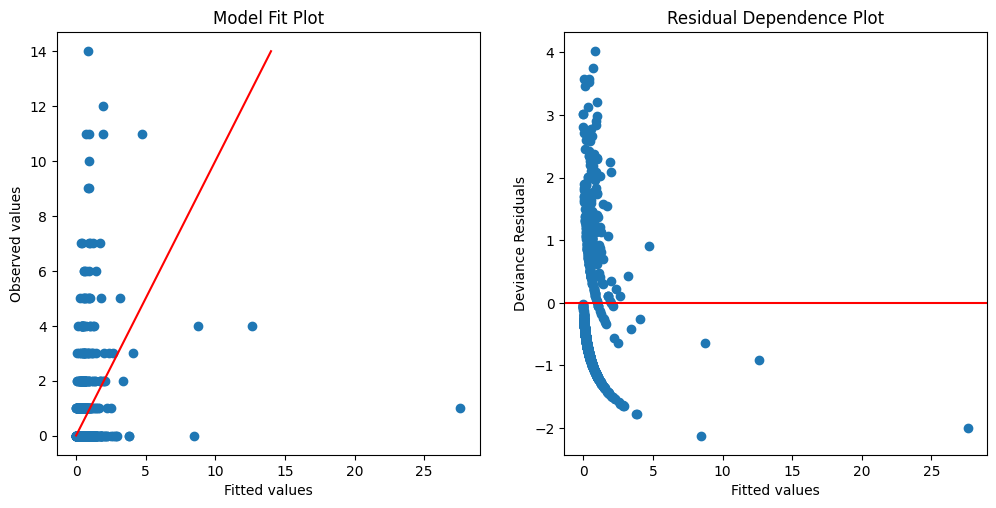

In [28]:
def diagnostic_plots(fit, response):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(fit.fittedvalues, response)
    abline_max = min(max(fit.fittedvalues), max(response))
    ax1.plot([0, abline_max], [0, abline_max], color='r')
    ax1.set_title('Model Fit Plot')
    ax1.set_ylabel('Observed values')
    ax1.set_xlabel('Fitted values');
    ax1.set_box_aspect(1)

    ax2.scatter(fit.fittedvalues, fit.resid_deviance)
    ax2.axhline(0, color='r')
    ax2.set_title('Residual Dependence Plot')
    ax2.set_ylabel('Deviance Residuals')
    ax2.set_xlabel('Fitted values')
    ax2.set_box_aspect(1)
    
diagnostic_plots(fitNB, dfc.reports)

- There are a few points that are outliers


- Lets look at [leverage](https://en.wikipedia.org/wiki/Leverage_(statistics))

In [29]:
lev = fitNB.get_influence(observed=False).summary_frame()
lev.cooks_d.sort_values(ascending=False)[:10]

846     0.127830
1034    0.120981
948     0.102479
1190    0.101169
351     0.066559
1287    0.054568
586     0.042880
867     0.042299
1192    0.040573
778     0.037043
Name: cooks_d, dtype: float64

In [30]:
dfc[lev.cooks_d > 0.1]

,reports,age,income,expenditure,owner,selfemp,dependents,months,majorcards,active
846,3,27.58333,5.5,1010.502,no,yes,0,72,yes,11
948,14,48.25000,2.0,0.000,yes,no,1,120,yes,15
1034,10,43.25000,5.0,0.000,yes,yes,4,144,yes,11
1190,9,30.33333,2.3,0.000,no,yes,3,15,yes,9


- Look at effect of high leverage points

In [31]:
dfl = dfc[lev.cooks_d < 0.1].copy()
fitNB2 = sm.GLM.from_formula(
    expr, data=dfl, family=sm.families.NegativeBinomial()).fit()
pd.concat(
    [fitNB.params.map(np.exp).round(2), fitNB.pvalues.round(3),
    fitNB2.params.map(np.exp).round(2), fitNB2.pvalues.round(3)],
    axis=1, keys=['NB params', 'NB pvals', 'NB2 params', 'NB2 pvals']
)

,NB params,NB pvals,NB2 params,NB2 pvals
Intercept,0.20,0.000,0.22,0.000
owner[T.yes],0.45,0.000,0.44,0.000
selfemp[T.yes],1.02,0.940,0.57,0.022
majorcards[T.yes],1.01,0.935,0.94,0.663
age,1.00,0.666,1.00,0.778
income,1.08,0.023,1.11,0.003
expenditure,1.00,0.000,1.00,0.000
dependents,1.09,0.049,1.05,0.309
months,1.00,0.005,1.00,0.016
active,1.11,0.000,1.11,0.000


- Biggest change was on self employment


- Removing data is serious so it is important to be explicit about it and speak with the investigator/client


- `expenditure` and `months` are both significant but parameters are equal to one; we should change expenditure to expenditure per 100 and  months to years

### Choosing a model

- Choosing a model can be difficult


- Important: All models are *wrong*, but some are helpful


- Consider how well *you* understand the model and can *communicate* the findings


- Consider using other model (not in body of report) as sensitivity analysis


- People are *always* developing new (complicated) methods to tackle very specific data problems
    - It is ok (good) to use a simple model even if it is not perfect
    

- If you notice a problem with the data, use Google (search engine) to find solutions
    - Consider the time it might take you to implement a better method and evaluate the pay off

In [32]:
dfl['years'] = dfl['months']/12
dfl['expenditure100'] = dfl['expenditure']/12
expr2 = '''reports ~ age + income + expenditure100 + owner + 
        selfemp + dependents + years + majorcards + active'''
fitNB2 = sm.GLM.from_formula(
    expr2, data=dfl, family=sm.families.NegativeBinomial()).fit()
def make_regression_table(fit):
    params = pd.DataFrame({'Rate': fit.params})
    ci_table = fit.conf_int().rename(columns={0:"Lower", 1:"Upper"})
    table = params.join(ci_table).applymap(np.exp).round(2)
    table['pvalue'] = fit.pvalues.round(3)
    return(table)

make_regression_table(fitNB2)

,Rate,Lower,Upper,pvalue
Intercept,0.22,0.13,0.35,0.000
owner[T.yes],0.44,0.34,0.58,0.000
selfemp[T.yes],0.57,0.35,0.92,0.022
majorcards[T.yes],0.94,0.71,1.24,0.663
age,1.00,0.99,1.02,0.778
income,1.11,1.04,1.19,0.003
expenditure100,0.96,0.95,0.97,0.000
dependents,1.05,0.96,1.15,0.309
years,1.03,1.00,1.05,0.016
active,1.11,1.09,1.12,0.000


| Variable | Rate Ratio (CI) | p-value |
| --- | --- | --- |
| Age (years) | 1.00 (0.99, 1.02) | 0.778 |
| Yearly Income (10,000 USD) | 1.11 (1.04, 1.19) | 0.003 |
| Average Monthly Credit Card Expenditure (per 100 USD) | 0.96 (0.95, 0.97) | <0.001 |
| Homeowner vs Renter | 0.44 (0.34, 0.58) | <0.001 |
| Self Employed vs not | 0.57 (0.35, 0.92) | 0.022 |
| Number of Dependents | 1.05 (0.96, 1.15) | 0.309 |
| Years Living at Current Address | 1.03 (1.00, 1.05) | 0.016 |
| Has other major credit cards vs not | 0.94 (0.71, 1.24) | 0.663 |
| Number of Active Credit Accounts | 1.11 (1.09, 1.12) | <0.001 |

Table 1: The table above provides the regression parameters and p-values for number of derogatory reports.

#### Interpretation

- Explain enough of the results so that the reader can apply interpret other rows of the table


###### How to explain parameter point estimates

- Recall that we use a $\log$ transformation for negative binomial, so 
$$E[Y|X=x] = \exp(\beta_0 + \beta_1 x_1 + \cdots +\beta_p x_p)$$


- Explain what happens to $E[Y|X]$ when $x_k \rightarrow x_k+1$:
$$
\begin{align*}
&E[Y|X=(1, x_1,\dots, x_k+1, \dots, x_p)] \\
&= \exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_k(x_k+1) + \cdots +\beta_p x_p) \\
&= \exp(\beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k + \cdots +\beta_p x_p)\exp(\beta_k) \\
&= E[Y|X=(1, x_1,\dots, x_k, \dots, x_p)]\exp(\beta_k) \\
\end{align*}
$$


- A unit increase in $x_k$ results in an increase (or decrease) of $E[Y|X]$ by a factor of $\exp(\beta_k)$


- Assume that $\exp(\beta_j) = 1$ if its $p$-value > $\alpha$-level


The regression model indicates that income, expenditure, homeowner status, self-employment status, time at current address, and number of active credit accounts are all significantly associated with derogatory reports while age, number of dependents, and having other major credit cards is not, at a $\alpha=0.05$ significance level.
Further, the model suggests that for each additional active credit account, we can expect an individual's expected number of derogatory reports to increase by a factor of 1.11, on average.
Alternately, an individual who is self employed will have a fewer derogatory reports, a decrease by a factor of 0.57, compared to not self employed.

### Communicating Findings


- Even though GLMs are association models, investigators will use these models to attempt to explain a causal relationship using expert subject-matter knowledge



- Opinion: most common mistake is not considering the audience
 - Which details will be helpful and which will be lost?
 - What kinds of graphics will make explanations more clear or give more useful information?
 
**Suggestions for Intro**

- First sentence should introduce the subject-matter in a way that a 5-year old can understand but addresses your client's needs


- Second sentence should focus more on the problem at hand


- Next, what is the problem you are trying to answer?


- Without using jargon, how will you address it?


- In one sentence, what is the most important finding?


- Someone who has no idea about your work should be able to follow and understand your first paragraph


**Suggestions for method**

- In this section, you should describe the methods that you used, specifically, how it is appropriate for the data


- Start with the purpose of your modeling


- Don't describe the data here
    - you can explain how the response and covariate helped you decide on a model
    - For example, the response here is counts data so we need an appropriate model


- The level of detail for this section will vary depending on the audience


- It's typically easier to go into too much detail - more appropriate for a technical audience


- For this class, you should assume that the audience is a subject-matter expert, but without a background in statistics


- Use simpler language when possible:
    - More confusing: Due to the covariance structure among the observation, we used a mixed-effects model.
    - Less confusing: This data is includes many observations from individuals over time.  To account for this, we used a mixed-effects model.


**Results**

- Begin the results with a high-level overview of the data without modeling, e.g. number of rows, columns, data cleaning


- Provide table of distribution metrics (mean, standard deviation, or median, IQR)



- If you need to drop observations because they're not appropriate for your purpose, or missing data, etc, a diagram is helpful, especially when rows indicate individual data.


- Graphics are often very powerful for communicating ideas
    - there should be a lot of graphics in your appendix to help you understand the data, from these, choose one or two that directly answers the question of interest


- Provide a table of regression parameters transformed for easy interpretation, e.g. show exp(beta)
    - Model: $E[Y|X=x] = \exp(\beta x)$, present $\exp(\beta)$, not $\beta$
    - Using delta method, we can also transform the confidence intervals


- In words, clearly explain how to interpret the parameters by explaining a couple.


**Conclusion**

- Restate what you attempted to answer


- State any potential limitations


- Summarize finds for the purpose of the analysis

Question: There is always a single best model
- a) True
- b) False


Question: In order to use AIC, I must understand the underlying math
- a) True
- b) False


Check-in: How do you feel about the first assignment?
- a) Good, I understand the expectations and I feel that I have the skills to do a good job
- b) Unsure, I understand the expectations but I feel that I'm missing some of the skills necessary to do a good job
- c) Not good, I am unclear of the expectations